In [1]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import seaborn as sns

# 7-membered Rings

In [2]:
data = pd.read_csv("data/seven_to_sixteen.csv")

/home/lucian/anaconda3/envs/Rings/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
seven = data[data["size"]==7] # 7-membered ring
seven_0 = seven[(seven[["Bond{}".format(x) for x in range(7)]]).sum(axis=1)==7] # no double bond

# Puckering Amplitude 7-membered ring (No endocyclic double bond)

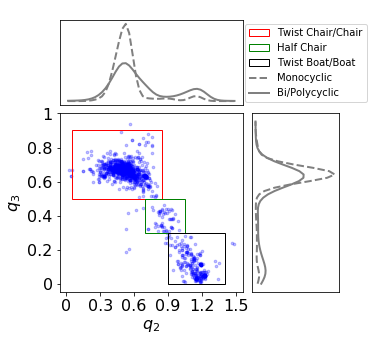

In [4]:
seven_0_mono = seven_0[(seven_0[["R{}".format(x) for x in range(7)]]=="M").sum(axis=1)==7]   
seven_0_poly = seven_0[(seven_0[["R{}".format(x) for x in range(7)]]=="M").sum(axis=1)!=7]
fig = plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(nrows=3,ncols=3,wspace=0.1,hspace=0.1)
x,y = np.linspace(0,1.5,50), np.linspace(0,1,50)
X,Y = np.meshgrid(x,y)
ax0_joint = fig.add_subplot(gs[1:3,0:2])
ax0_marg_x = fig.add_subplot(gs[0,0:2])
ax0_marg_y = fig.add_subplot(gs[1:3,2])

joinx = np.concatenate([seven_0_mono["q2"], seven_0_poly["q2"]])
joiny = np.concatenate([seven_0_mono["q3"], seven_0_poly["q3"]])
ax0_joint.scatter(joinx,joiny,s=7, color="b",alpha=0.25)

mono_seven_q2 = gaussian_kde(seven_0_mono["q2"])
poly_seven_q2 = gaussian_kde(seven_0_poly["q2"])
mono_seven_q3 = gaussian_kde(seven_0_mono["q3"])
poly_seven_q3 = gaussian_kde(seven_0_poly["q3"])

ax0_marg_x.plot(x, mono_seven_q2(x),ls="--",color="grey",lw=2, label="Monocyclic")
ax0_marg_x.plot(x, poly_seven_q2(x),ls="-",color="grey",lw=2, label="Bi/Polycyclic")
ax0_marg_y.plot(mono_seven_q3(y),y,ls="--",color="grey",lw=2)
ax0_marg_y.plot(poly_seven_q3(y),y,ls="-",color="grey",lw=2)

ax0_marg_x.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax0_marg_y.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax0_marg_x.get_xaxis().set_visible(False)
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_y.get_xaxis().set_visible(False)
ax0_marg_y.get_yaxis().set_visible(False)
ax0_joint.set_xlabel(r"$q_{2}$",fontsize=16)
ax0_joint.set_ylabel(r"$q_{3}$",fontsize=16)
ax0_joint.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax0_joint.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax0_joint.set_xticklabels(["0","0.3","0.6","0.9","1.2","1.5"], fontsize=16)
ax0_joint.set_yticklabels(["0","0.2","0.4","0.6","0.8","1"],fontsize=16)
rect = patches.Rectangle((0.05,0.5),0.8,0.4,linewidth=1, edgecolor="r", facecolor="none", label="Twist Chair/Chair")
ax0_joint.add_patch(rect)
rect1 = patches.Rectangle((0.70,0.3),0.35,0.2,linewidth=1, edgecolor="green", facecolor="none", label="Half Chair")
ax0_joint.add_patch(rect1)
rect2 = patches.Rectangle((0.9,0.0),0.5,0.3,linewidth=1, edgecolor="black", facecolor="none", label="Twist Boat/Boat")
ax0_joint.add_patch(rect2)
fig.legend(loc=(0.65,0.7))
plt.show()


# Chair/Twist-Chair Pseudorotation 

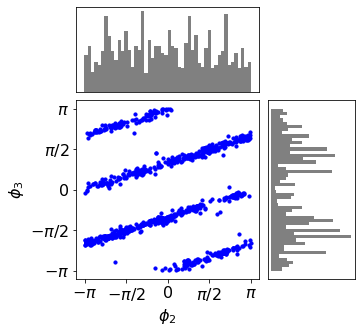

In [5]:
fig = plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(nrows=3,ncols=3,wspace=0.1,hspace=0.1)
x,y = np.linspace(-np.pi,np.pi,100), np.linspace(-np.pi,np.pi,100)
X,Y = np.meshgrid(x,y)
ax0_joint = fig.add_subplot(gs[1:3,0:2])
ax0_marg_x = fig.add_subplot(gs[0,0:2])
ax0_marg_y = fig.add_subplot(gs[1:3,2])

redbox = seven_0[(seven_0["q2"]<1) & (seven_0["q2"]>0.1) & (seven_0["q3"]>0.45)] # rough boundary for chain/twist chair
ax0_marg_x.hist(redbox["phi2"],color="grey",bins=50)
ax0_marg_y.hist(redbox["phi3"],color="grey",bins=50, orientation="horizontal")
ax0_joint.scatter(redbox["phi2"],redbox["phi3"],s=10, color="b")
ax0_marg_x.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_marg_y.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_marg_x.get_xaxis().set_visible(False)
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_y.get_xaxis().set_visible(False)
ax0_marg_y.get_yaxis().set_visible(False)
ax0_joint.set_xlabel(r"$\phi_{2}$",fontsize=16)
ax0_joint.set_ylabel(r"$\phi_{3}$",fontsize=16)
ax0_joint.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_joint.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_joint.set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$",r"$\pi$"], fontsize=16)
ax0_joint.set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$",r"$\pi$"],fontsize=16)
plt.show()

# Puckering Amplitude 7-membered ring (two endocyclic double bonds)



In [6]:
seven_2 = seven[(seven[["Bond{}".format(x) for x in range(7)]]!=1.0).sum(axis=1)==2] # 2 double bond
seven_2_1_3 = seven_2[(seven_2["Bond0"]!=1) & (seven_2["Bond2"]!=1)] # 2 double bonds, at 1,3 position
seven_2_1_4 = seven_2[(seven_2["Bond0"]!=1) & (seven_2["Bond3"]!=1)] # 2 double bonds, at 1,4 position

# Double bonds at 1,3 position

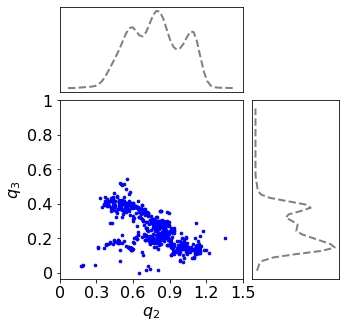

In [7]:
seven_2_1_3_mono = seven_2_1_3[(seven_2_1_3[["R{}".format(x) for x in range(7)]]=="M").sum(axis=1)==7]   
seven_2_1_3_poly = seven_2_1_3[(seven_2_1_3[["R{}".format(x) for x in range(7)]]=="M").sum(axis=1)!=7]
fig = plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(nrows=3,ncols=3,wspace=0.1,hspace=0.1)
x,y = np.linspace(0,1.5,50), np.linspace(0,1,50)
X,Y = np.meshgrid(x,y)
ax0_joint = fig.add_subplot(gs[1:3,0:2])
ax0_marg_x = fig.add_subplot(gs[0,0:2])
ax0_marg_y = fig.add_subplot(gs[1:3,2])

seven_2_1_3_q2 = gaussian_kde(seven_2_1_3["q2"])
seven_2_1_3_q3 = gaussian_kde(seven_2_1_3["q3"])

ax0_marg_x.plot(x, seven_2_1_3_q2(x),ls="--",color="grey",lw=2)
ax0_marg_y.plot(seven_2_1_3_q3(y),y,ls="--",color="grey",lw=2)
ax0_joint.scatter(seven_2_1_3["q2"],seven_2_1_3["q3"],s=7, color="b")

ax0_marg_x.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax0_marg_y.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax0_marg_x.get_xaxis().set_visible(False)
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_y.get_xaxis().set_visible(False)
ax0_marg_y.get_yaxis().set_visible(False)
ax0_joint.set_xlabel(r"$q_{2}$",fontsize=16)
ax0_joint.set_ylabel(r"$q_{3}$",fontsize=16)
ax0_joint.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax0_joint.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax0_joint.set_xticklabels(["0","0.3","0.6","0.9","1.2","1.5"], fontsize=16)
ax0_joint.set_yticklabels(["0","0.2","0.4","0.6","0.8","1"],fontsize=16)
plt.show()




# Phase Angle Preferences

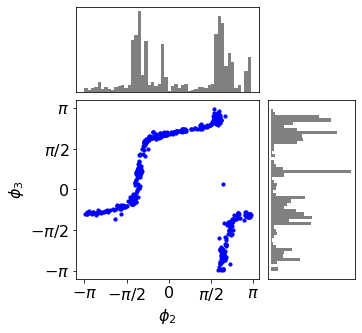

In [8]:
fig = plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(nrows=3,ncols=3,wspace=0.1,hspace=0.1)
x,y = np.linspace(-np.pi,np.pi,100), np.linspace(-np.pi,np.pi,100)
X,Y = np.meshgrid(x,y)
ax0_joint = fig.add_subplot(gs[1:3,0:2])
ax0_marg_x = fig.add_subplot(gs[0,0:2])
ax0_marg_y = fig.add_subplot(gs[1:3,2])

ax0_marg_x.hist(seven_2_1_3["phi2"],color="grey",bins=50)
ax0_marg_y.hist(seven_2_1_3["phi3"],color="grey",bins=50, orientation="horizontal")
ax0_joint.scatter(seven_2_1_3["phi2"],seven_2_1_3["phi3"],s=10, color="b")
ax0_marg_x.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_marg_y.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_marg_x.get_xaxis().set_visible(False)
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_y.get_xaxis().set_visible(False)
ax0_marg_y.get_yaxis().set_visible(False)
ax0_joint.set_xlabel(r"$\phi_{2}$",fontsize=16)
ax0_joint.set_ylabel(r"$\phi_{3}$",fontsize=16)
ax0_joint.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_joint.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_joint.set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$",r"$\pi$"], fontsize=16)
ax0_joint.set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$",r"$\pi$"],fontsize=16)
plt.show()

# Double Bond at 1,4 Position

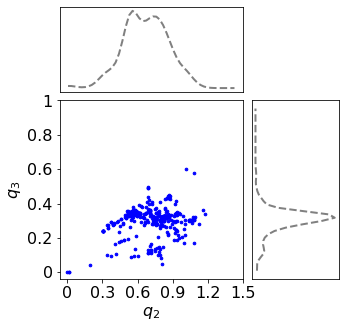

In [9]:
seven_2_1_4_mono = seven_2_1_4[(seven_2_1_4[["R{}".format(x) for x in range(7)]]=="M").sum(axis=1)==7]   
seven_2_1_4_poly = seven_2_1_4[(seven_2_1_4[["R{}".format(x) for x in range(7)]]=="M").sum(axis=1)!=7]
fig = plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(nrows=3,ncols=3,wspace=0.1,hspace=0.1)
x,y = np.linspace(0,1.5,50), np.linspace(0,1,50)
X,Y = np.meshgrid(x,y)
ax0_joint = fig.add_subplot(gs[1:3,0:2])
ax0_marg_x = fig.add_subplot(gs[0,0:2])
ax0_marg_y = fig.add_subplot(gs[1:3,2])

seven_2_1_4_q2 = gaussian_kde(seven_2_1_4["q2"])
seven_2_1_4_q3 = gaussian_kde(seven_2_1_4["q3"])

ax0_marg_x.plot(x, seven_2_1_4_q2(x),ls="--",color="grey",lw=2)
ax0_marg_y.plot(seven_2_1_4_q3(y),y,ls="--",color="grey",lw=2)
ax0_joint.scatter(seven_2_1_4["q2"],seven_2_1_4["q3"],s=7, color="b")

ax0_marg_x.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax0_marg_y.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax0_marg_x.get_xaxis().set_visible(False)
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_y.get_xaxis().set_visible(False)
ax0_marg_y.get_yaxis().set_visible(False)
ax0_joint.set_xlabel(r"$q_{2}$",fontsize=16)
ax0_joint.set_ylabel(r"$q_{3}$",fontsize=16)
ax0_joint.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax0_joint.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax0_joint.set_xticklabels(["0","0.3","0.6","0.9","1.2","1.5"], fontsize=16)
ax0_joint.set_yticklabels(["0","0.2","0.4","0.6","0.8","1"],fontsize=16)
plt.show()

# Phase Angle Preferences

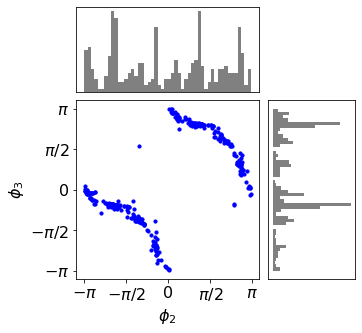

In [10]:
fig = plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(nrows=3,ncols=3,wspace=0.1,hspace=0.1)
x,y = np.linspace(-np.pi,np.pi,100), np.linspace(-np.pi,np.pi,100)
X,Y = np.meshgrid(x,y)
ax0_joint = fig.add_subplot(gs[1:3,0:2])
ax0_marg_x = fig.add_subplot(gs[0,0:2])
ax0_marg_y = fig.add_subplot(gs[1:3,2])

ax0_marg_x.hist(seven_2_1_4["phi2"],color="grey",bins=50)
ax0_marg_y.hist(seven_2_1_4["phi3"],color="grey",bins=50, orientation="horizontal")
ax0_joint.scatter(seven_2_1_4["phi2"],seven_2_1_4["phi3"],s=10, color="b")
ax0_marg_x.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_marg_y.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_marg_x.get_xaxis().set_visible(False)
ax0_marg_x.get_yaxis().set_visible(False)
ax0_marg_y.get_xaxis().set_visible(False)
ax0_marg_y.get_yaxis().set_visible(False)
ax0_joint.set_xlabel(r"$\phi_{2}$",fontsize=16)
ax0_joint.set_ylabel(r"$\phi_{3}$",fontsize=16)
ax0_joint.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_joint.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_joint.set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$",r"$\pi$"], fontsize=16)
ax0_joint.set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$",r"$\pi$"],fontsize=16)
plt.show()